In [1]:
import numpy as np
import seaborn as sns
import matplotlib.colors as clr
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import pandas as pd
import squarify 

In [2]:
sns.set(rc={'figure.figsize':(15,8)})
sns.set(style="white", context="talk")

In [5]:
years = pd.read_csv('acousticbrainz-2015-01-actual-release-years.csv', header=None)

In [168]:
year_counts = pd.Series.value_counts(years[1])

year_counts = year_counts.drop(labels=list(filter(lambda x: (x<1950.0),year_counts.keys())))
year_counts_int = pd.to_numeric(year_counts.keys(), downcast='integer')

quantiles = years[1].quantile([0.25,0.5,0.75])

In [ ]:
quantiles = quantiles - 1950


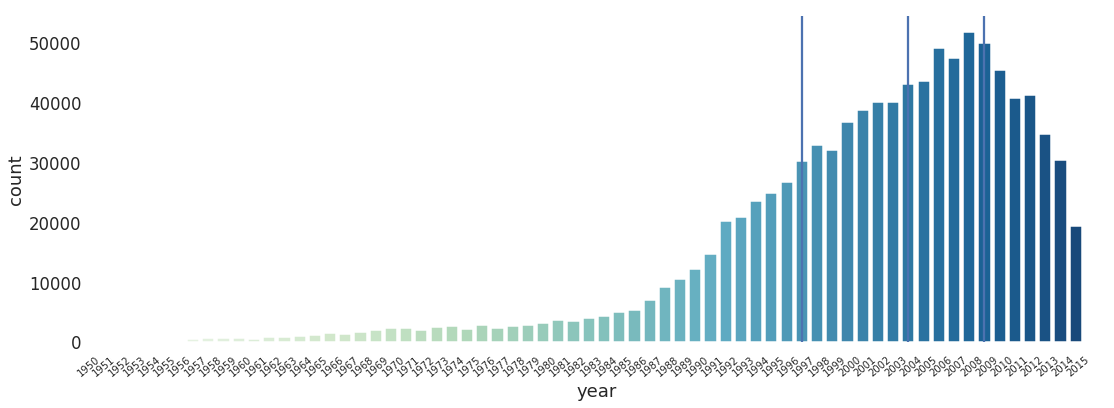

In [184]:
plt.figure(figsize=(18,6))

ax = sns.barplot(x=year_counts_int, y=year_counts, palette='GnBu')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)

plt.axvline(quantiles[0.25], 0, 1)
plt.axvline(quantiles[0.50], 0, 1)
line = plt.axvline(quantiles[0.75], 0, 1)

plt.ylabel('count')
plt.xlabel('year')
sns.despine(left=True, bottom=True)
plt.show()


In [92]:
features = pd.read_csv('ab-2017-01-23-loudness-features.csv')

In [96]:
y_dict = dict(zip(years[0], years[1]))

avg_loudness = features['average_loudness']
f_mbids = features['recording_mbid']
l_dict = dict(zip(f_mbids, avg_loudness))

In [110]:
x = []
y = []
for mbid in y_dict:
    
    if mbid in l_dict and y_dict[mbid] >= 1950.0: 
        x.append(y_dict[mbid])
        y.append(l_dict[mbid]) 
        
x_int = pd.to_numeric(x, downcast='integer')

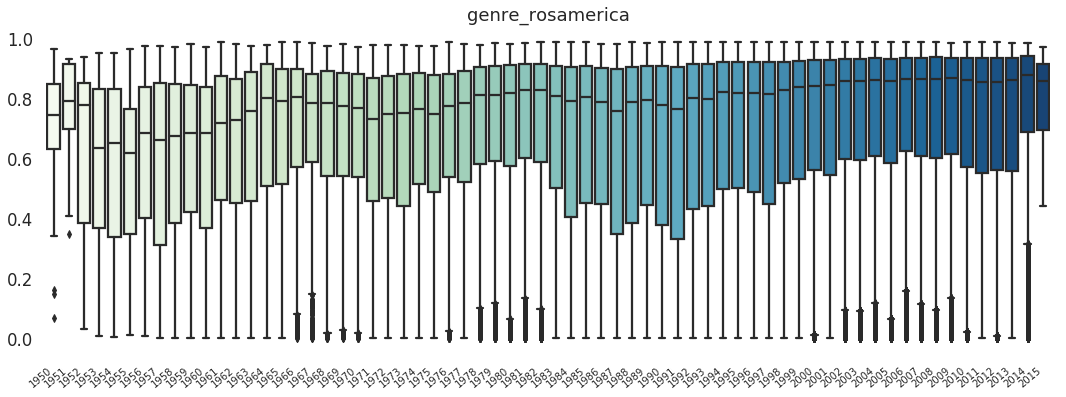

In [194]:
plt.figure(figsize=(18,6))
ax = sns.boxplot(x=x_int, y=np.array(y), palette='GnBu')
sns.despine(left=True, bottom=True)
ax.set_title('genre_rosamerica')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right", fontsize=10)
sns.despine(left=True, bottom=True)
plt.show()